# Data Analysis of All the unicorns in the world

Import all the necessary libraries.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Read the csv file of the dataset.

In [2]:
unicorns_df = pd.read_csv('/kaggle/input/all-the-unicorns-in-the-world/List of Unicorns in the World.csv')

In [3]:
unicorns_df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry
0,0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment
1,1,SpaceX,$150,12/1/2012,United States,Hawthorne,Industrials
2,2,OpenAI,$80,7/22/2019,United States,San Francisco,Enterprise Tech
3,3,SHEIN,$66,7/3/2018,Singapore,Singapore City,Consumer & Retail
4,4,Stripe,$65,1/23/2014,United States,San Francisco,Financial Services


In [4]:
unicorns_df.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry'],
      dtype='object')

Replace the 'dollar sign'  in the Valuation ($B) column.

In [5]:
unicorns_df["Valuation ($B)"] = unicorns_df["Valuation ($B)"].replace(['\$'], '', regex=True)

In [6]:
unicorns_df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry
0,0,ByteDance,225,4/7/2017,China,Beijing,Media & Entertainment
1,1,SpaceX,150,12/1/2012,United States,Hawthorne,Industrials
2,2,OpenAI,80,7/22/2019,United States,San Francisco,Enterprise Tech
3,3,SHEIN,66,7/3/2018,Singapore,Singapore City,Consumer & Retail
4,4,Stripe,65,1/23/2014,United States,San Francisco,Financial Services


In [7]:
type(unicorns_df)

pandas.core.frame.DataFrame

Dropping the Unnamed column.

In [8]:
unicorns_df.drop('Unnamed: 0', axis=1, inplace=True)

Checking the shape of the dataset.

In [9]:
unicorns_df.shape

(1233, 6)

Making a new column for the year joined.

In [10]:
unicorns_df['Date Joined'] = pd.to_datetime(unicorns_df['Date Joined'])

In [11]:
unicorns_df['Year Joined'] = unicorns_df['Date Joined'].dt.year

In [12]:
unicorns_df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Year Joined
0,ByteDance,225,2017-04-07,China,Beijing,Media & Entertainment,2017
1,SpaceX,150,2012-12-01,United States,Hawthorne,Industrials,2012
2,OpenAI,80,2019-07-22,United States,San Francisco,Enterprise Tech,2019
3,SHEIN,66,2018-07-03,Singapore,Singapore City,Consumer & Retail,2018
4,Stripe,65,2014-01-23,United States,San Francisco,Financial Services,2014


In [13]:
unicorns_df.drop('Date Joined', axis=1, inplace=True)

In [14]:
unicorns_df.head()

,Company,Valuation ($B),Country,City,Industry,Year Joined
0,ByteDance,225,China,Beijing,Media & Entertainment,2017
1,SpaceX,150,United States,Hawthorne,Industrials,2012
2,OpenAI,80,United States,San Francisco,Enterprise Tech,2019
3,SHEIN,66,Singapore,Singapore City,Consumer & Retail,2018
4,Stripe,65,United States,San Francisco,Financial Services,2014


In [15]:
unicorns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1233 non-null   object
 1   Valuation ($B)  1233 non-null   object
 2   Country         1233 non-null   object
 3   City            1233 non-null   object
 4   Industry        1233 non-null   object
 5   Year Joined     1233 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 53.1+ KB


Checking for the null values.

In [16]:
unicorns_df.isnull().sum().sort_values(ascending=False)

Company           0
Valuation ($B)    0
Country           0
City              0
Industry          0
Year Joined       0
dtype: int64

Countries of the unicorns.

In [17]:
unicorns_df.Country.unique()

array(['China', 'United States', 'Singapore', 'Australia',
       'United Kingdom', 'Germany', 'India', 'Israel', 'Seychelles',
       'Sweden', 'Turkey', 'Mexico', 'Estonia', 'Canada', 'South Korea',
       'Netherlands', 'France', 'Finland', 'Colombia', 'Belgium',
       'Brazil', 'Denmark', 'Switzerland', 'Lithuania', 'Austria',
       'Ireland', 'Indonesia', 'Vietnam', 'Italy', 'United Arab Emirates',
       'Argentina', 'Spain', 'Greece', 'Hong Kong', 'Japan', 'Luxembourg',
       'Nigeria', 'Croatia', 'Senegal', 'Malaysia', 'Bermuda', 'Norway',
       'South Africa', 'Ecuador', 'Chile', 'Thailand', 'Czech Republic',
       'Uzbekistan', 'Egypt', 'Saudi Arabia', 'Cayman Islands',
       'Liechtenstein', 'Philippines'], dtype=object)

Description of the dataset.

In [18]:
unicorns_df.describe()

,Year Joined
count,1233.000000
mean,2020.433901
std,2.041148
min,2007.000000
25%,2020.000000
50%,2021.000000
75%,2022.000000
max,2024.000000


In [19]:
unicorns_df.head(10)

,Company,Valuation ($B),Country,City,Industry,Year Joined
0,ByteDance,225,China,Beijing,Media & Entertainment,2017
1,SpaceX,150,United States,Hawthorne,Industrials,2012
2,OpenAI,80,United States,San Francisco,Enterprise Tech,2019
3,SHEIN,66,Singapore,Singapore City,Consumer & Retail,2018
4,Stripe,65,United States,San Francisco,Financial Services,2014
5,Databricks,43,United States,San Francisco,Enterprise Tech,2019
6,Canva,25.4,Australia,Surry Hills,Enterprise Tech,2018
7,Revolut,33,United Kingdom,London,Financial Services,2018
8,Epic Games,22.5,United States,Cary,Media & Entertainment,2018
9,Fanatics,31,United States,Jacksonville,Consumer & Retail,2012


## Data visualization

In [20]:
top_countries = unicorns_df.Country.value_counts().head(10)
top_countries

Country
United States     656
China             168
India              71
United Kingdom     54
Germany            31
France             26
Israel             25
Canada             21
Brazil             17
Singapore          17
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'China'),
  Text(2, 0, 'India'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Israel'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Brazil'),
  Text(9, 0, 'Singapore')])

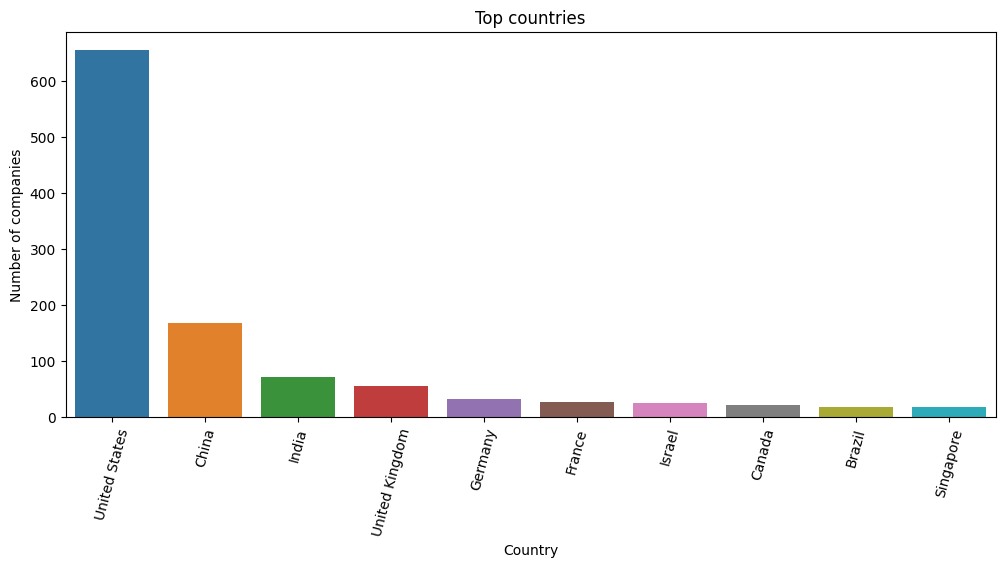

In [21]:
plt.figure(figsize=(12,5))
plt.title("Top countries")
plt.ylabel("Number of companies")
plt.xlabel("Countries")
sns.barplot(x=top_countries.index, y=top_countries.values);
plt.xticks(rotation=75)

In [22]:
industry_count = unicorns_df['Industry'].value_counts()
industry_count

Industry
Enterprise Tech               388
Financial Services            220
Consumer & Retail             213
Industrials                   185
Healthcare & Life Sciences    117
Media & Entertainment          83
Insurance                      26
Health                          1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Enterprise Tech'),
  Text(1, 0, 'Financial Services'),
  Text(2, 0, 'Consumer & Retail'),
  Text(3, 0, 'Industrials'),
  Text(4, 0, 'Healthcare & Life Sciences'),
  Text(5, 0, 'Media & Entertainment'),
  Text(6, 0, 'Insurance'),
  Text(7, 0, 'Health')])

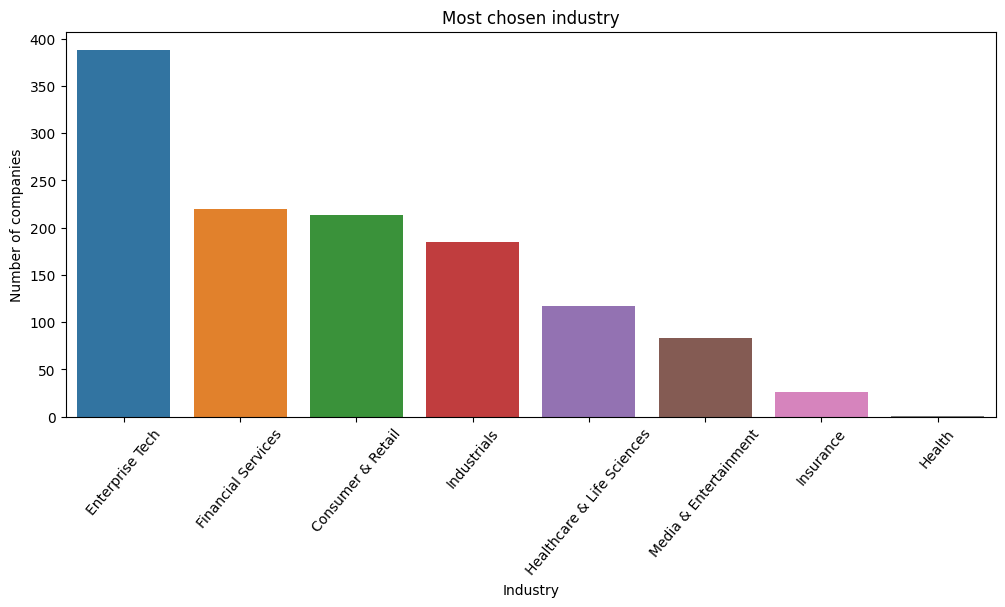

In [23]:
plt.figure(figsize=(12,5))
plt.title('Most chosen industry')
plt.ylabel("Number of companies")
plt.xlabel("Industries")
sns.barplot(x=industry_count.index, y=industry_count.values);
plt.xticks(rotation=50)

In [24]:
highest_no_of_unicorns = unicorns_df['City'].value_counts().head(10)
highest_no_of_unicorns

City
San Francisco    172
New York         116
Beijing           64
London            42
Shanghai          38
Bengaluru         32
Palo Alto         22
Paris             21
Boston            19
Berlin            18
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'San Francisco'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'Beijing'),
  Text(3, 0, 'London'),
  Text(4, 0, 'Shanghai'),
  Text(5, 0, 'Bengaluru'),
  Text(6, 0, 'Palo Alto'),
  Text(7, 0, 'Paris'),
  Text(8, 0, 'Boston'),
  Text(9, 0, 'Berlin')])

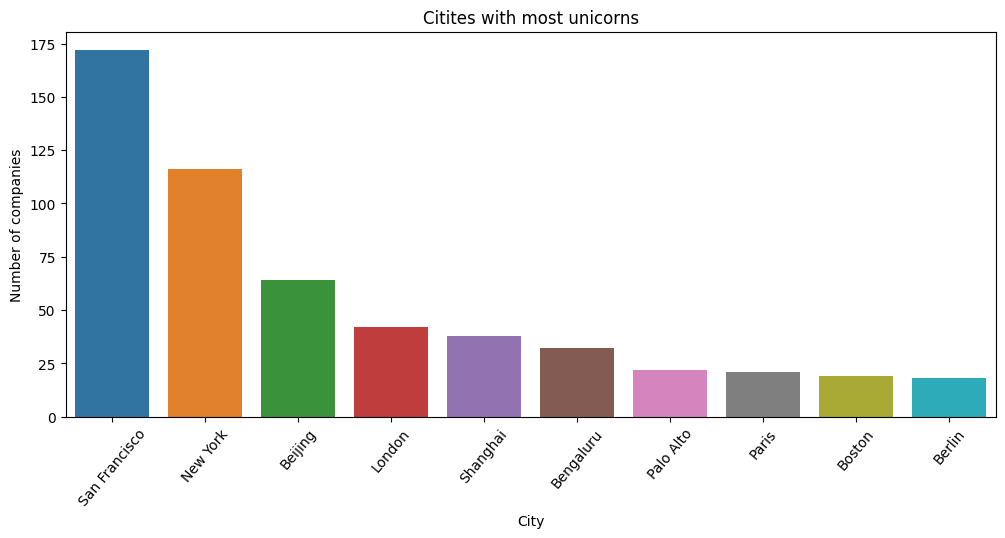

In [25]:
plt.figure(figsize=(12,5))
plt.title("Citites with most unicorns")
plt.ylabel("Number of companies")
plt.xlabel("Cities")
sns.barplot(x=highest_no_of_unicorns.index, y=highest_no_of_unicorns.values);
plt.xticks(rotation=50)

In [26]:
year_joined = unicorns_df['Year Joined'].value_counts().head(10)
year_joined

Year Joined
2021    503
2022    254
2020     97
2019     93
2018     90
2023     69
2017     38
2015     33
2024     19
2016     18
Name: count, dtype: int64

<Axes: title={'center': 'Year in which most unicorns joined'}, xlabel='Year Joined', ylabel='Number of companies'>

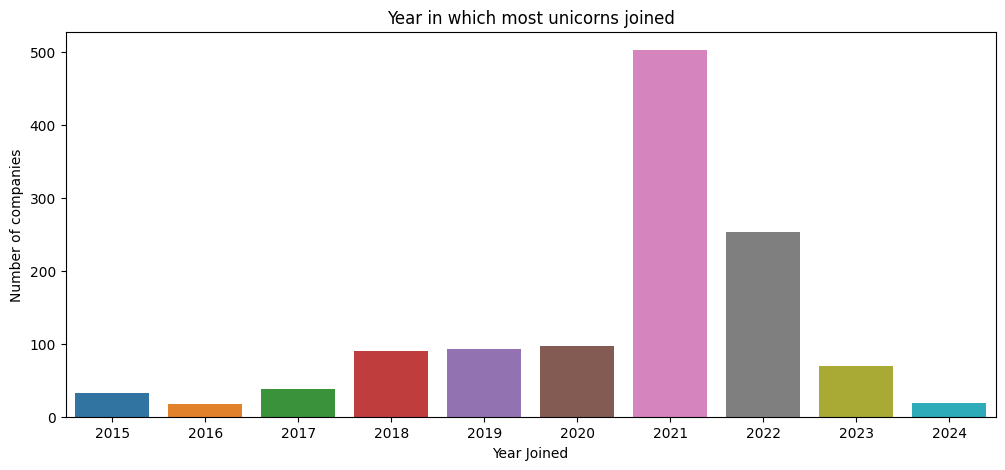

In [27]:
plt.figure(figsize=(12,5))
plt.title('Year in which most unicorns joined')
plt.ylabel("Number of companies")
plt.xlabel("Years")
sns.barplot(x=year_joined.index, y=year_joined.values)